# UBC MRI Research Python Workshop 2

## August 22 2017



1. Higher dimension numpy arrays
    * Indexing
    * Slicing
    * Boolean Masks
        * Exercise: Mask one array with another array of the same shape
   
2. Object-oriented programing
    * Writing classes
    * Initializing and manipulating objects
        * Exercise: Create an Image class
        
3. Matplotlib plotting
    * Plotting the object-oriented way
    * Changing plot attributes
    * Subplots
        * Exercise: Plot a 2D image
        
4. Curve fitting
    * Linear transform
        * Exercise: scipy.optimize.curve_fit()
        
5. Pandas
    * Importing and examining dataframes
    * Indexing dataframes
    * Condition indexing
    * Plotting
        * Exercise: Vancouver Open Data Catalogue
    

## Numpy indexing

https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [1]:
import numpy as np

In [2]:
arr = np.random.randint(0,100,(8,8))

In [3]:
arr

array([[39, 19, 37, 87, 11, 26, 71, 94],
       [92, 87, 26, 70, 64, 13, 19, 91],
       [36, 83, 74, 66, 32, 15,  8, 59],
       [ 3, 60, 59, 17, 96, 26, 26, 64],
       [ 3, 17, 83, 95, 68, 37,  9,  9],
       [35, 38, 17, 76, 19,  4, 58, 24],
       [11, 58, 79, 74, 60, 95, 98, 25],
       [ 5, 24, 97, 95, 91, 43, 23, 97]])

In [4]:
arr.shape

(8, 8)

In [5]:
arr[4,5]

37

In [6]:
arr[1]

array([92, 87, 26, 70, 64, 13, 19, 91])

In [7]:
arr[1:6,2]

array([26, 74, 59, 83, 17])

In [8]:
arr[:,2]

array([37, 26, 74, 59, 83, 17, 79, 97])

In [9]:
arr[1:6:2,2]

array([26, 59, 17])

### Slicing summary: (start:stop:step)

In [10]:
arr[1::2,2]

array([26, 59, 17, 97])

In [13]:
arr[::-2,2]

array([97, 17, 59, 26])

### Boolean masks

In [15]:
1 > 5

False

In [16]:
arr == 37

array([[False, False,  True, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False,  True, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]], dtype=bool)

In [17]:
arr > 37

array([[ True, False, False,  True, False, False,  True,  True],
       [ True,  True, False,  True,  True, False, False,  True],
       [False,  True,  True,  True, False, False, False,  True],
       [False,  True,  True, False,  True, False, False,  True],
       [False, False,  True,  True,  True, False, False, False],
       [False,  True, False,  True, False, False,  True, False],
       [False,  True,  True,  True,  True,  True,  True, False],
       [False, False,  True,  True,  True,  True, False,  True]], dtype=bool)

In [18]:
arr[arr > 37]

array([39, 87, 71, 94, 92, 87, 70, 64, 91, 83, 74, 66, 59, 60, 59, 96, 64,
       83, 95, 68, 38, 76, 58, 58, 79, 74, 60, 95, 98, 97, 95, 91, 43, 97])

In [19]:
mask = arr > 37

In [20]:
mask

array([[ True, False, False,  True, False, False,  True,  True],
       [ True,  True, False,  True,  True, False, False,  True],
       [False,  True,  True,  True, False, False, False,  True],
       [False,  True,  True, False,  True, False, False,  True],
       [False, False,  True,  True,  True, False, False, False],
       [False,  True, False,  True, False, False,  True, False],
       [False,  True,  True,  True,  True,  True,  True, False],
       [False, False,  True,  True,  True,  True, False,  True]], dtype=bool)

In [21]:
arr[mask]

array([39, 87, 71, 94, 92, 87, 70, 64, 91, 83, 74, 66, 59, 60, 59, 96, 64,
       83, 95, 68, 38, 76, 58, 58, 79, 74, 60, 95, 98, 97, 95, 91, 43, 97])

In [22]:
arr[mask].mean()

75.32352941176471

## Exercise: Mask one array with another array of the same shape
* Create two arrays with random digits
* Find all entries in array 1 where array 2 is larger than N
* Take the mean of the result

Options
* Investigate the different ways to create random arrays in numpy
* Take the threshold N as the 90th percentile of array 2

In [23]:
myshape = (10,12)
arr1 = np.random.randint(100,200,myshape)
arr2 = np.random.randint(0,500,myshape)

In [24]:
arr1.shape

(10, 12)

In [25]:
arr2.shape

(10, 12)

In [26]:
N = 300

In [30]:
arr1[arr2 > N].mean()

149.47368421052633

## Higher dimensional arrays

In [31]:
arr3d = np.random.randint(0,100,(52,52,12))

In [33]:
arr3d.shape

(52, 52, 12)

In [35]:
slices = arr3d[:,:,::2]

In [36]:
slices.shape

(52, 52, 6)

## Exercise: Take the mean across the 4th dimension (temporal averaging)

In [37]:
arr4d = np.random.randint(0,100,(4,4,4,50))

In [40]:
temp_arr = arr4d.mean(axis=3)

In [41]:
temp_arr.shape

(4, 4, 4)

In [59]:
arr4d.shape

(4, 4, 4, 50)

## Classes and Objects

Classes are a smart way to organize your code. Instead of looping funtions, define a class to describe subjects, timepoints, events, etc and give the class attributes and methods.

Our first class will describe a subject in our study. Our class will be called "Subject", and it's only attribute will be the subject ID of a given subject.

In [42]:
class Subject():
    pass

In [43]:
sub1 = Subject()

In [44]:
sub1.subID = 'sub001'

In [45]:
sub1.subID

'sub001'

Let's give the class some information when it's first called

In [54]:
class Subject():
    def __init__(self,x):
        self.subID = x
        

In [55]:
sub2 = Subject('sub002')

In [56]:
sub2.subID

'sub002'

`__init__` is a special method. It is automatically called when the object is created. The first argument to `__init__` is always "self". "self" gives a method access to all the attributes of the object. Any other arguments are passed to the object when it is created, like when you run a subject.

With this simple class definition, we can create subject objects, pass subject IDs on creation, then access the subject ID on demand.

In [62]:
sub1 = Subject('01')
sub2 = Subject('02')

In [63]:
sub1.subID

'01'

In [64]:
sub2.subID

'02'

Let's expand the class to add some additional attributes, and a method which modifies those attributes

In [72]:
class Subject():
    def __init__(self,subID,data):
        self.subID = subID
        self.data = data
        
    def clean_data(self):
        # Set negative values to zero
        self.data = [ 0 if x<0 else x for x in self.data ]
        
    

In [73]:
sub4 = Subject('04',[5,-3,8,-2,0,5,9])

In [74]:
sub4.subID

'04'

In [75]:
sub4.data

[5, -3, 8, -2, 0, 5, 9]

In [76]:
sub4.clean_data()

In [77]:
sub4.data

[5, 0, 8, 0, 0, 5, 9]

Finally, let's do some data validation. 

In the constructor, we'll check whether "data" is a list. If not we'll raise an error.

We'll also convert the "date" string into a date object that python understands.

Let's imagine that there was a calibration error for all data collected in 2016, so we need to increase all data values by 1 for dates in 2016 but not in 2017. We can add this to the cleandata() method.

First, let's make a new subject but pass the wrong type of data:

Now let's create two subjects with identical data, but with acquisition dates in different years

## Class inheritence

Classes can inherit from each other. So, you can write a general Subject class that contains all the typical attributes of a research subject, then write a sub-class to customize it for your specific study

In [78]:
class MRISubject(Subject):
    pass

In [79]:
mrisub1 = MRISubject('01',[1,3,5,6])

In [ ]:
mrisub1.

The above class inherits everything from the Subject class and adds nothing. We can do better! Let's add an attribute that's a list of scans acquired for this subject.

To do this, we need to modify the __init__ command. If we wanted, we could just write a new definition of __init__; but that would lose the work we did in the base class. Instead, we will define a new __init__ but bring in all the attributes from the base class as well.

Another change we will make is that the new attribut `scans` will be optional. We do this by assigning a default values in the __init__ definition. When this is done, the use can either set the value of scans themself or leave it blank.

## Exercise: Image Object

Create a class that defines a 3D image object. 
* Define a class called something like Image
* Give the class an attribute called "header" that is a dictionary of image properties
* Write a method called "generate_image()" or similar that generates a 3D matrix of random values and assigns it as an attribute
* Write a method called "generate_mask()" that generates a 3D matrix of the same size as your first image. The mask should be all zeros except for a region of ones. Your mask can be simple or complex. Assign the mask as an attribute
* Write a method that takes the mean of the image matrix where mask values are 1

Things to think about:
* Which methods should be run automatically, and which should the user call?
* What other methods can we write?

In [109]:
class Image():
    def __init__(self):
        self.header = {'date':'2017=08-22','scanner':'UBC 3T' }
        
    def generates_image(self):
        self.image = np.random.randint(0,100,(52,52,12))
        
    def generates_mask(self):
        self.mask = np.zeros((52,52,12))
        self.mask[20:30,20:30,:] = 1
        
    def get_mean_mask(self):
        self.mymean = self.image[self.mask == 1].mean()
        return self.mymean

In [110]:
myimage = Image()

In [111]:
myimage.header['scanner']

'UBC 3T'

In [112]:
myimage.generates_image()

In [113]:
myimage.generates_mask()

In [114]:
myimage.get_mean_mask()

49.8675

In [115]:
myimage.mymean

49.8675

# Plotting with MatPlotLib

There are two ways to interact with MatPlotLib: the scripting interface (pyplot), or the object-oriented interface. Both produce the same results and are useful in different situations. This tutorial will mostly use the object-oriented technique since I like it more, but when looking things up online keep in mind that both exist

There are two main objects in MPL: The figure and the axis. Each figure is a separate image. Each axis contains one or more datasets visualizations. A figure can have any number of axes in it, but each axis belongs to a single figure.

The function `plt.subplots(n)` creates a figure with `n` axes arranged vertically. We'll start with one axis and then make it more complicated.

In [117]:
from matplotlib import pyplot as plt
%matplotlib notebook

First, let's invent some data. Let's make 1000 evenly spaced points between 0 and 4$\pi$ on the x axis, and a cosine function as the y data:

In [118]:
xdata = np.linspace(0,4*np.pi,num=1000)

In [120]:
ydata = np.cos(xdata)

<IPython.core.display.Javascript object>


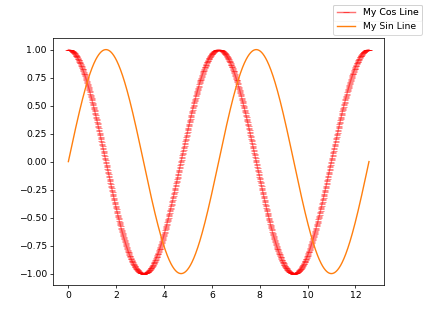

In [124]:
f, ax = plt.subplots()
lines = ax.plot(xdata,ydata)

In [126]:
lines
cosline = lines[0]

In [127]:
cosline

In [128]:
cosline.set_color('red')

In [130]:
cosline.set_marker('_')

In [131]:
cosline.set_alpha(0.5)

In [132]:
ax.set_axis_off()

In [133]:
ax.set_axis_on()

In [135]:
f.legend([cosline],['My Cos Line'])

In [136]:
ydata2 = np.sin(xdata)

In [137]:
[sinline] = ax.plot(xdata,ydata2)

In [139]:
f.legend([cosline,sinline],['My Cos Line','My Sin Line'])

Let's start again with a new figure with 2 axes. Let's generate some random data for the second axis

In [140]:
ynoise = np.random.random(1000)/5

In [141]:
ydata_measured = ydata + ynoise

<IPython.core.display.Javascript object>


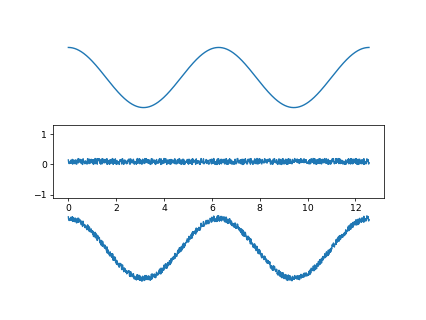

In [149]:
f,ax = plt.subplots(3,sharey=True)
[line1] = ax[0].plot(xdata,ydata)
[line2] = ax[1].plot(xdata,ynoise)
[line3] = ax[2].plot(xdata,ydata_measured)

for a in [ax[0],ax[2]]:
    a.set_axis_off()

Note that `ax` is now an array of axes. We access them with `ax[0]` and `ax[1]`

We can make subplots in different arrangements simply

<IPython.core.display.Javascript object>


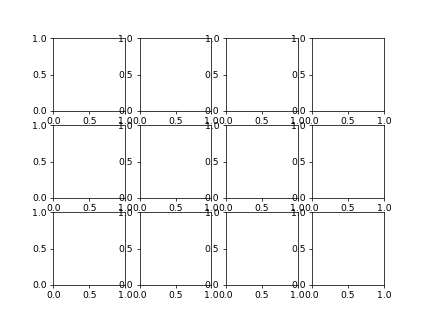

In [150]:
f,ax = plt.subplots(3,4)

Or make arrangments more complicated

<IPython.core.display.Javascript object>


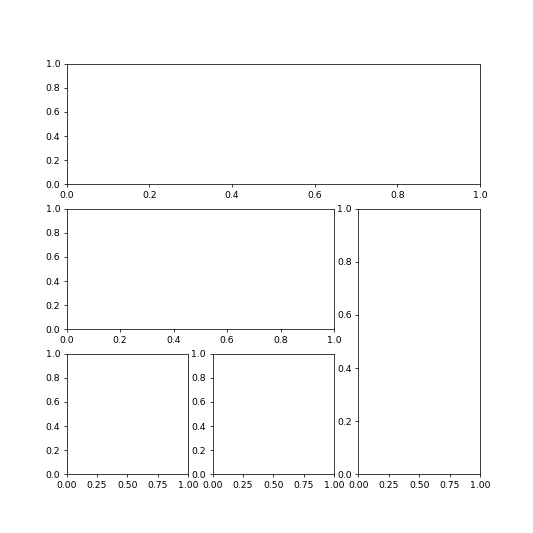

In [151]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8, 8))

gs = gridspec.GridSpec(3, 3)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[1:, 2])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

## Exercise: Plot a 2D array with `matshow()`

* Create a 2D or 3D array
* Draw the 2D array (or a slice of the 3D array) with matshow
* Experiment with changing the properties of the plot

Optional:
* Add additional axes with more information

In [152]:
arr2d = np.random.randint(0,100,(80,80))

<IPython.core.display.Javascript object>


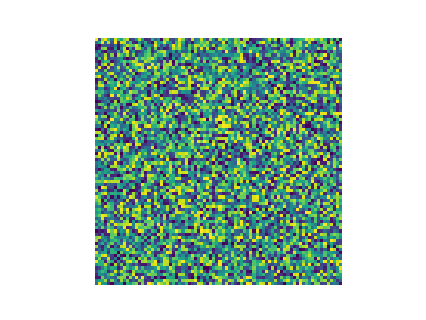

In [157]:
f,ax = plt.subplots()
ax.matshow(arr2d)
ax.set_axis_off()

# Curve Fitting

Let's generate an exponential decay, and add some noise to the data.

Set the "true" values for A and T, then generate some sample data

## Linear transform fit
If we know the data is exponential, it's quickest to transform the data and do a linear fit


$$ 
S = Ae^{{-t}/{T}}
$$
$$
\log{S} = \log{A} - \frac{t}{T} 
$$

Therefore when we plot log of signal vs time, 

$$
slope=-1/T
$$

Generate some new data based on our measured A and T values

## Exercise: curve_fit
Use `scipy.optimize.curve_fit()` to fit the same ydata directly to the exponential decay function that we defined. Plot the fit. Is it better or worse than the linear fit?

## Exercise: Write an image class that can fit a curve across the time dimension

* Write an image generator method that generates a 4D image that contains a exponential decay timeseries along each voxel. Add some noise to make it realistic
* Keep the mask generator method from last time
* Write a method that computes the decay constant in each masked voxel
* Write a method that omputes the mean time constant in masked voxels and assign to to an attribute
* Write a method that plots some orthogonal slices
* Write a method that plots a histogram of the time constant distribution in masked voxels

Some tips:
* Take one step at a time
* Test frequently
* Use google! Anything that seems tricky probably has a simple solution

## Pandas
[pandas](http://pandas.pydata.org/) is the data analysis package in Python. It provides a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) object which acts like a spreadsheet. Let's import the package and some data:

The Vancouver Police Deparment publishes crime data through City of Vancouver's Open Data Catalogue. Let's import the data (prepared and posted at math.ubc.ca/~pwalls) using the `pandas.read_csv()` function:

Examine the top few lines to the dataframe

User the `info` method to learn about the columns in the dataframe

Use the DataFrame method unique to see the different types of crimes in the dataset:

Notice that we select columns using brackets and the column name. There are some crimes that do not include the longitude and latitude coordinates due to privacy. Let's do a query and select the rows where the X coordinate is 0:

To access individual cells, we can use Datafram methods `.loc` or `.iloc`

Plot the data

We can save a modified dataframe as CSV (or XLS or...)

## Exercise: Vancouver Open Data

Choose your own dataset from the (Vancouver Open Data catalogue)[http://data.vancouver.ca/datacatalogue/index.htm]. Filter and plot the data.